# Heart Disease Prediction - EDA Demo

Demonstrating NumPy, Pandas, Matplotlib and Seaborn.

Dataset: Heart Disease Dataset (heart.csv)

In [1]:
# Imports and plotting style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [ ]:
# PART 1: PANDAS - Data Loading and Exploration
print('='*70)
print('PART 1: PANDAS - DATA LOADING AND EXPLORATION')
print('='*70)

# Load the dataset 
df = pd.read_csv('../data/heart.csv')
print('Original columns:', list(df.columns))

# Normalize column names: lower-case, strip, replace spaces/dashes with underscore
df.columns = [c.strip().lower().replace(' ', '_').replace('-', '_') for c in df.columns]
print('Normalized columns:', list(df.columns))

# Map common column names in this CSV to the names the notebook expects
mapping = {
    'age': 'age',
    'sex': 'sex',
    'chestpaintype': 'cp', 'chest_pain_type': 'cp', 'cp': 'cp',
    'restingbp': 'trestbps', 'resting_bp': 'trestbps',
    'cholesterol': 'chol',
    'fastingbs': 'fbs', 'fasting_bs': 'fbs',
    'restingecg': 'restecg',
    'maxhr': 'thalach', 'max_hr': 'thalach', 'thalach': 'thalach',
    'exerciseangina': 'exang', 'exercise_angina': 'exang',
    'oldpeak': 'oldpeak',
    'st_slope': 'slope', 'st_slope': 'slope',
    'heartdisease': 'target', 'heart_disease': 'target', 'target': 'target'
}

rename_map = {k: v for k, v in mapping.items() if k in df.columns}
if rename_map:
    df.rename(columns=rename_map, inplace=True)

print('Columns after mapping:', list(df.columns))

print('\n1.1 First Few Rows:')
df.head()

PART 1: PANDAS - DATA LOADING AND EXPLORATION
Original columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
Normalized columns: ['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs', 'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope', 'heartdisease']
Columns after mapping: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'target']

1.1 First Few Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Dataset info, describe, shape, missing values and target distribution
print('\n1.2 Dataset Information:')
df.info()

print('\n1.3 Statistical Summary:')
df.describe()

print('\n1.4 Shape of Dataset:')
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

print('\n1.5 Missing Values:')
df.isnull().sum()




1.2 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  target    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

1.3 Statistical Summary:

1.4 Shape of Dataset:
Rows: 918, Columns: 12

1.5 Missing Values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

## PART 2: NUMPY - Numerical Computations

In [9]:
# Convert pandas columns to numpy arrays for demonstration
age = df['age'].values
chol = df['chol'].values
trestbps = df['trestbps'].values

print('\n2.1 Basic NumPy Statistics:')
print(f'Mean Age: {np.mean(age):.2f}')
print(f'Median Cholesterol: {np.median(chol):.2f}')
print(f'Std Dev of Blood Pressure: {np.std(trestbps):.2f}')

print('\n2.2 Percentiles:')
print(f'25th percentile of Age: {np.percentile(age, 25):.2f}')
print(f'75th percentile of Age: {np.percentile(age, 75):.2f}')

print('\n2.3 Correlation between Age and Cholesterol:')
correlation = np.corrcoef(age, chol)[0, 1]
print(f'Correlation coefficient: {correlation:.4f}')

print('\n2.4 Vectorized Operations (Age Categories):')
age_categories = np.where(age < 40, 'Young',
                          np.where(age < 55, 'Middle-aged', 'Senior'))
unique, counts = np.unique(age_categories, return_counts=True)
for cat, count in zip(unique, counts):
    print(f'{cat}: {count}')

# Calculate correlation matrix using NumPy
print('\n2.5 Correlation Matrix (NumPy):')
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = np.corrcoef(df[numeric_cols].T)
print(f'Shape: {correlation_matrix.shape}')


2.1 Basic NumPy Statistics:
Mean Age: 53.51
Median Cholesterol: 223.00
Std Dev of Blood Pressure: 18.50

2.2 Percentiles:
25th percentile of Age: 47.00
75th percentile of Age: 60.00

2.3 Correlation between Age and Cholesterol:
Correlation coefficient: -0.0953

2.4 Vectorized Operations (Age Categories):
Middle-aged: 391
Senior: 447
Young: 80

2.5 Correlation Matrix (NumPy):
Shape: (7, 7)


## PART 3: PANDAS - Advanced Data Analysis

In [10]:
print('\n3.1 Group By Analysis - Heart Disease by Sex:')
df.groupby('sex')['target'].value_counts().unstack(fill_value=0)

print('\n3.2 Age Groups Analysis:')
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], 
                          labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
df.groupby('age_group')['target'].mean()

print('\n3.3 Chest Pain Type Analysis:')
df.groupby('cp')['target'].agg(['count', 'mean'])

print('\n3.4 High Cholesterol Cases (>240):')
high_chol = df[df['chol'] > 240]
print(f'Number of cases: {len(high_chol)}')
print(f"Heart disease rate: {high_chol['target'].mean():.2%}")


3.1 Group By Analysis - Heart Disease by Sex:

3.2 Age Groups Analysis:

3.3 Chest Pain Type Analysis:

3.4 High Cholesterol Cases (>240):
Number of cases: 355
Heart disease rate: 53.80%


C:\Users\iasma\AppData\Local\Temp\ipykernel_23548\445574255.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['target'].mean()


## PART 4: MATPLOTLIB - Data Visualization

C:\Users\iasma\AppData\Local\Temp\ipykernel_23548\1913591137.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['target']==0]['chol'], df[df['target']==1]['chol']],
C:\Users\iasma\AppData\Local\Temp\ipykernel_23548\1913591137.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease = df.groupby('age_group')['target'].mean() * 100



✓ Visualizations saved as 'heart_disease_eda.png'


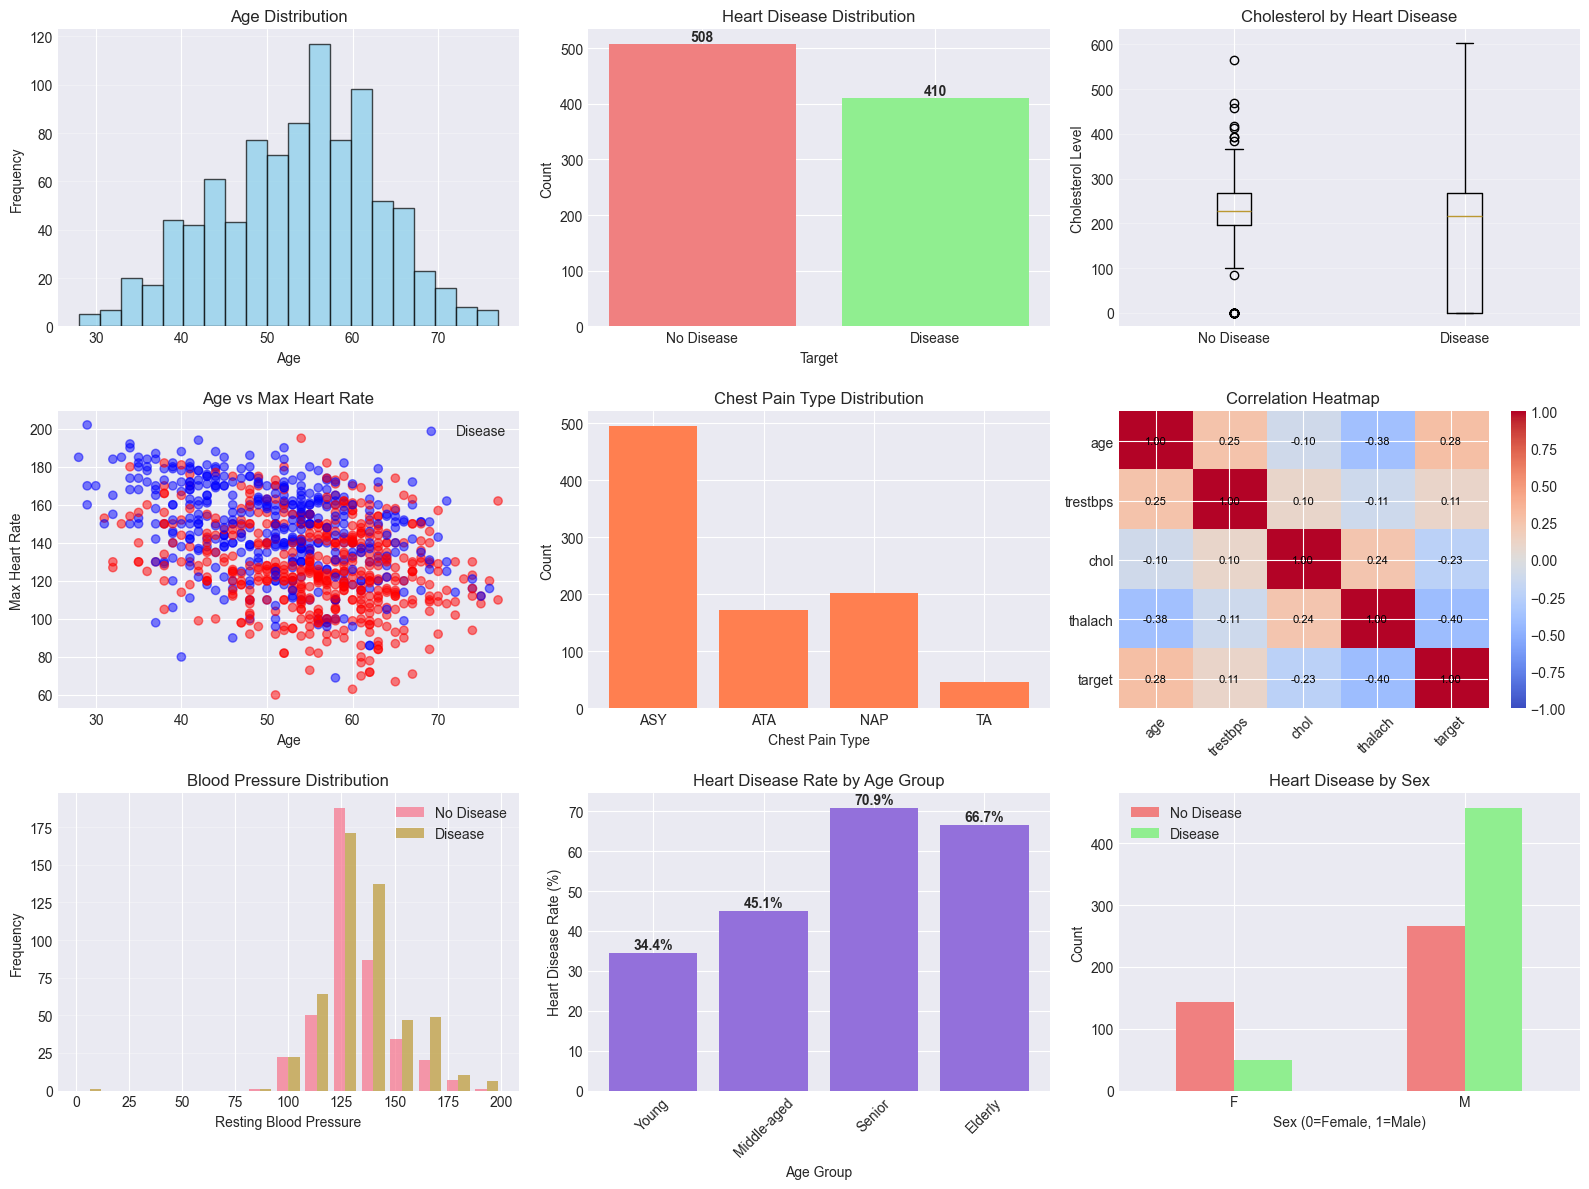

In [11]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 4.1 Age Distribution
plt.subplot(3, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.3)

# 4.2 Heart Disease Distribution
plt.subplot(3, 3, 2)
target_counts = df['target'].value_counts()
plt.bar(['No Disease', 'Disease'], target_counts.values, color=['lightcoral', 'lightgreen'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 4.3 Cholesterol Distribution by Target
plt.subplot(3, 3, 3)
plt.boxplot([df[df['target']==0]['chol'], df[df['target']==1]['chol']], 
            labels=['No Disease', 'Disease'])
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol by Heart Disease')
plt.grid(axis='y', alpha=0.3)

# 4.4 Age vs Max Heart Rate (Scatter)
plt.subplot(3, 3, 4)
colors = ['red' if x == 1 else 'blue' for x in df['target']]
plt.scatter(df['age'], df['thalach'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

# 4.5 Chest Pain Type Distribution
plt.subplot(3, 3, 5)
cp_counts = df['cp'].value_counts().sort_index()
plt.bar(cp_counts.index, cp_counts.values, color='coral')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.xticks(cp_counts.index)

# 4.6 Correlation Heatmap
plt.subplot(3, 3, 6)
corr_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
corr_matrix = df[corr_features].corr()
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(corr_features)), corr_features, rotation=45)
plt.yticks(range(len(corr_features)), corr_features)
plt.title('Correlation Heatmap')
for i in range(len(corr_features)):
    for j in range(len(corr_features)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontsize=8)

# 4.7 Blood Pressure Distribution
plt.subplot(3, 3, 7)
plt.hist([df[df['target']==0]['trestbps'], df[df['target']==1]['trestbps']], 
         bins=15, label=['No Disease', 'Disease'], alpha=0.7)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Blood Pressure Distribution')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4.8 Age Group vs Heart Disease
plt.subplot(3, 3, 8)
age_disease = df.groupby('age_group')['target'].mean() * 100
plt.bar(range(len(age_disease)), age_disease.values, color='mediumpurple')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Rate (%)')
plt.title('Heart Disease Rate by Age Group')
plt.xticks(range(len(age_disease)), age_disease.index, rotation=45)
for i, v in enumerate(age_disease.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 4.9 Sex vs Heart Disease
plt.subplot(3, 3, 9)
sex_disease = df.groupby('sex')['target'].value_counts().unstack()
sex_disease.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightgreen'])
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.title('Heart Disease by Sex')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('heart_disease_eda.png', dpi=300, bbox_inches='tight')
print('\n✓ Visualizations saved as \'heart_disease_eda.png\'')
plt.show()

In [13]:
# SUMMARY STATISTICS
print('\n' + '='*70)
print('SUMMARY: KEY FINDINGS')
print('='*70)

print(f"\n→ Total Patients: {len(df)}")
print(f"→ Heart Disease Cases: {df['target'].sum()} ({df['target'].mean()*100:.1f}%)")
print(f"→ Average Age: {df['age'].mean():.1f} years")
print(f"→ Average Cholesterol: {df['chol'].mean():.1f} mg/dl")
print(f"→ Average Max Heart Rate: {df['thalach'].mean():.1f} bpm")

print('\n' + '='*70)
print('EDA COMPLETE!')
print('='*70)


SUMMARY: KEY FINDINGS

→ Total Patients: 918
→ Heart Disease Cases: 508 (55.3%)
→ Average Age: 53.5 years
→ Average Cholesterol: 198.8 mg/dl
→ Average Max Heart Rate: 136.8 bpm

EDA COMPLETE!
